In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold, LeaveOneOut, cross_val_score
import numpy as np
import pandas as pd
iris_dataset = load_iris()
df = pd.DataFrame(iris_dataset.data[:,2:4], columns=iris_dataset.feature_names[2:4])
df.info()
print('\nКоличество пропусков: ', df.isna().sum().sum())
print('Количество дубликатов: ', df.duplicated().sum())
#df = df.drop_duplicates(keep='first')
#print('Дубликтов больше нет: ', df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   petal length (cm)  150 non-null    float64
 1   petal width (cm)   150 non-null    float64
dtypes: float64(2)
memory usage: 2.5 KB

Количество пропусков:  0
Количество дубликатов:  48


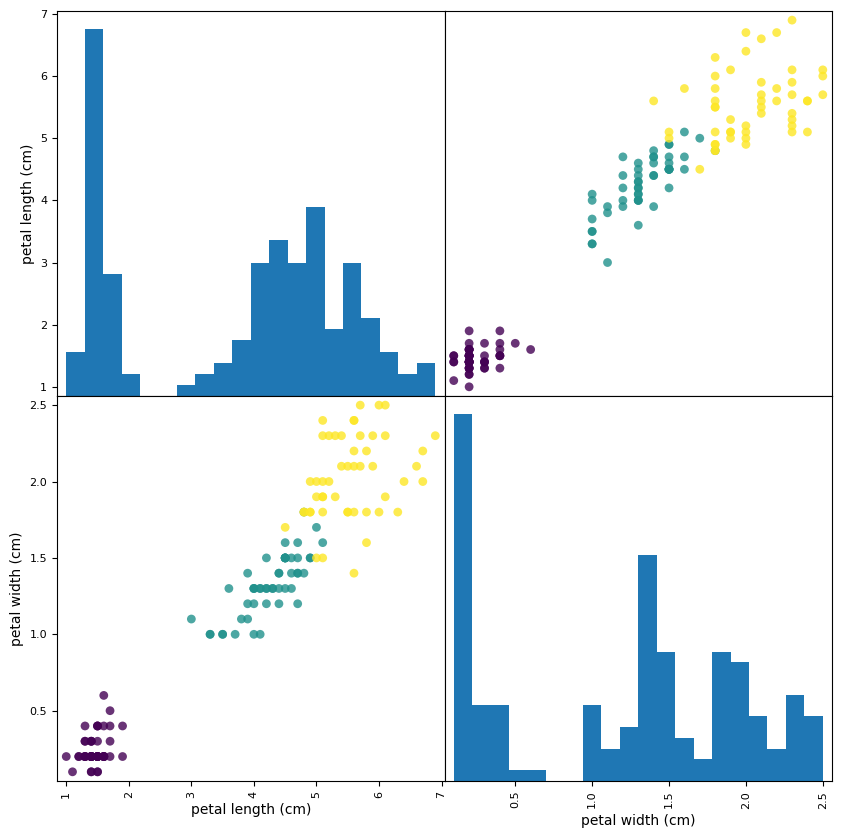

In [2]:
scat_mtrx = pd.plotting.scatter_matrix(df, c=iris_dataset['target'], figsize=(10, 10), marker='o', hist_kwds={'bins': 20}, s=40, alpha=.8)

In [3]:
x, y = iris_dataset.data[:, 2:4], iris_dataset['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
knn = KNeighborsClassifier(n_neighbors=30)
knn_model = knn.fit(x_train, y_train)
knn_predictions = knn.predict(x_test)
accuracy = accuracy_score(y_test, knn_predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9473684210526315


In [4]:
grid = GridSearchCV(knn, param_grid={'n_neighbors' : list(range(1,31))}, cv=2, scoring='accuracy')
model_grid = grid.fit(x, y)
print('Лучший гиперпараметр K: ' + str(model_grid.best_params_))
print('Лучший результат: ' + str(model_grid.best_score_))

Лучший гиперпараметр K: {'n_neighbors': 6}
Лучший результат: 0.9733333333333334


In [5]:
knn_random = RandomizedSearchCV(knn, {'n_neighbors' : list(range(1,31))}, n_iter=30, scoring="accuracy", n_jobs=-1, cv=2)
model_random = knn_random.fit(x, y)
print('Лучший гиперпараметр K: ' + str(model_random.best_params_))
print('Лучший результат: ' + str(model_random.best_score_))

Лучший гиперпараметр K: {'n_neighbors': 6}
Лучший результат: 0.9733333333333334


In [6]:
kf = KFold(n_splits=5)
scores = cross_val_score(knn, x, y, scoring="f1_weighted", cv=kf)
print(scores)

[1.         1.         0.88888889 0.93460925 0.75      ]


In [7]:
kf = LeaveOneOut()
scores = cross_val_score(knn, x, y, scoring="f1_weighted", cv=kf)
print(scores)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
